In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
df = pd.DataFrame({
    feature_name: column/15 for column, feature_name in zip(digits['data'].T, digits['feature_names'])
})
df['target'] = digits['target']

In [13]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,0.333333,0.866667,0.600000,0.066667,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.400000,0.866667,0.666667,0.000000,0.000000,0.0,0
1,0.0,0.0,0.000000,0.800000,0.866667,0.333333,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.733333,1.066667,0.666667,0.000000,0.0,1
2,0.0,0.0,0.000000,0.266667,1.000000,0.800000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.200000,0.733333,1.066667,0.600000,0.0,2
3,0.0,0.0,0.466667,1.000000,0.866667,0.066667,0.000000,0.0,0.0,0.533333,...,0.0,0.0,0.000000,0.466667,0.866667,0.866667,0.600000,0.000000,0.0,3
4,0.0,0.0,0.000000,0.066667,0.733333,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.133333,1.066667,0.266667,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.266667,0.666667,0.866667,0.400000,0.000000,0.0,0.0,0.066667,...,0.0,0.0,0.000000,0.133333,0.933333,1.000000,0.600000,0.000000,0.0,9
1793,0.0,0.0,0.400000,1.066667,0.866667,0.733333,0.066667,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.400000,1.066667,0.933333,0.400000,0.000000,0.0,0
1794,0.0,0.0,0.066667,0.733333,1.000000,0.066667,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.133333,0.600000,0.866667,0.400000,0.000000,0.0,8
1795,0.0,0.0,0.133333,0.666667,0.466667,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.333333,0.800000,1.066667,0.800000,0.000000,0.0,9


In [18]:
from sklearn.model_selection import train_test_split

X = df[digits['feature_names']]
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
Y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import f1_score, classification_report

print(f1_score(Y_pred, Y_test, average='weighted'))

0.9591563699062848


In [24]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.89      0.91        54
           2       0.96      0.98      0.97        52
           3       0.94      1.00      0.97        51
           4       0.98      0.96      0.97        49
           5       0.95      0.96      0.96        56
           6       0.98      0.97      0.98        61
           7       0.96      0.98      0.97        52
           8       0.92      0.93      0.93        60
           9       0.98      0.93      0.96        60

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



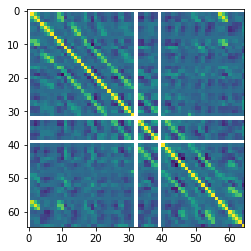

In [25]:
plt.figure()
plt.imshow(df.corr())
plt.show()

<AxesSubplot:>

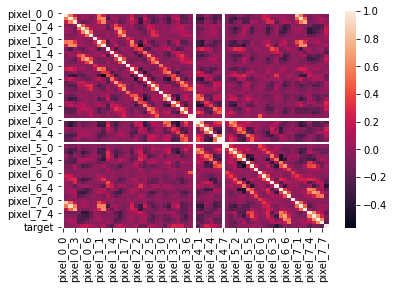

In [27]:
import seaborn as sns

sns.heatmap(df.corr())

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0).fit(X_train)

In [50]:
kmeans.labels_

array([ 6,  7, 11, ..., 17,  6,  9])

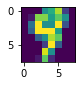

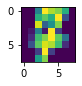

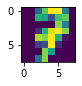

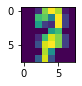

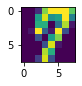

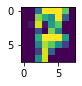

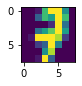

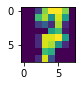

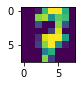

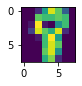

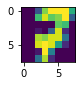

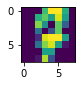

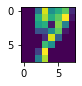

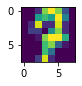

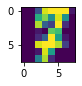

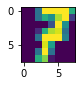

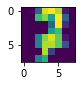

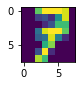

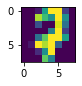

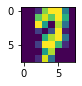

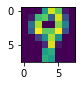

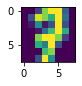

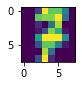

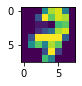

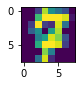

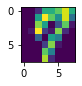

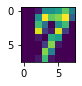

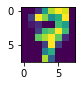

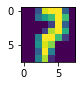

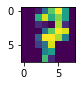

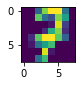

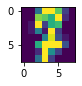

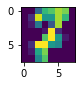

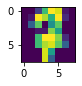

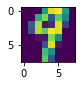

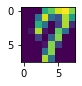

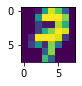

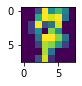

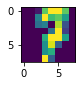

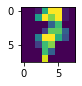

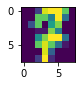

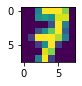

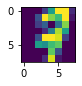

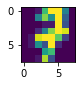

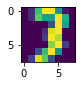

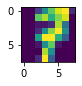

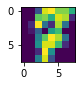

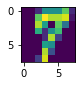

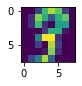

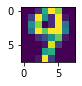

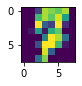

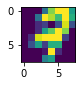

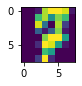

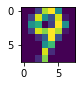

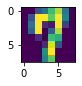

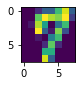

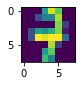

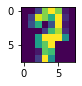

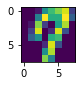

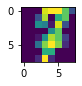

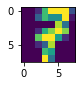

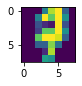

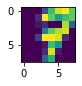

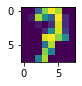

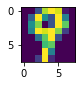

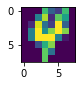

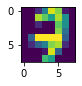

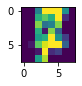

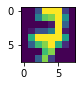

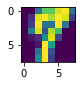

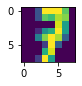

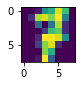

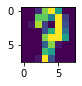

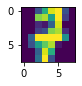

In [58]:
for image in X_train.values[kmeans.labels_==6]:
    plt.figure(figsize=(1, 1))
    plt.imshow(image.reshape((8, 8)))
    plt.show()

In [53]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_)

0.15461232972626898

In [34]:
silhouette_score(X, Y)

0.16294320522575215